In [1]:
#%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from pythreejs import *
from soda import *
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import plotly 
plotly.tools.set_credentials_file(username='jngc', api_key='CT53kjomy6ra9AqMdpmo')

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

# To-do:

1. Check the uncertainty of the model on the orbit and compare it with the uncertainty of the measurements.



In [36]:
#def galactocentric_theta_phi():
    
def orbit_plots(t, xyz, **kwargs):
    
    """
    Orbit projection plots
    """
    extract(kwargs)

    
    x = xyz[:,0]
    y = xyz[:,1]
    z = xyz[:,2]
    
    if 'xyz2' in kwargs:
        x2= xyz2[:,0]
        y2= xyz2[:,1]
        z2= xyz2[:,2]
    
    plt.figure(figsize=(24, 16))
    plt.subplot(2, 3, 1)
    plt.plot(x, y, lw=1.5)
    plt.scatter(x[-1], y[-1],  s=100)
    if 'xyz2' in kwargs:
        plt.plot(x2, y2, lw=1.5)
        plt.scatter(x2[-1], y2[-1], s=100)

    plt.xlabel('$x [Kpc]$', fontsize=25)
    plt.ylabel('$y [Kpc]$', fontsize=25)
    
    plt.subplot(2, 3, 2)
    plt.plot(x, z,   lw=1.5)
    plt.scatter(x[-1], z[-1], s=100)
    if 'xyz2' in kwargs:
        plt.plot(x2, z2, lw=1.5)
        plt.scatter(x2[-1], z2[-1], s=100)
        
    plt.xlabel('$x [Kpc]$', fontsize=25)
    plt.ylabel('$z [Kpc]$', fontsize=25)
 
    plt.subplot(2, 3, 3)
    plt.plot(y, z, lw=1.5)
    plt.scatter(y[-1], z[-1],  s=100)
    if 'xyz2' in kwargs:
        plt.plot(y2, z2, lw=1.5)
        plt.scatter(y2[-1], z2[-1], s=100)
    plt.xlabel('$y [Kpc]$', fontsize=25)
    plt.ylabel('$z [Kpc]$', fontsize=25)
    
    plt.subplot(2, 3, 4)
    plt.plot(t, (x**2.0+y**2.0+z**2.0)**0.5, lw=1.5, label='Tony')
    
    if 'xyz2' in kwargs:
        plt.plot(t, (x2**2.0+y2**2.0+z2**2.0)**0.5, lw=1.5, label='Massari')

    plt.legend()
    plt.xlabel('$\mathrm{Time [Gyrs]}$', fontsize=25)
    plt.ylabel('$\mathrm{R_{gal}[Kpc]}$', fontsize=25)
    
    

In [37]:
def aitoff_projection(x, y, z):
    """
    aitoff projection
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = arccos(z/r)
    phi = arctan2(y,x)
    
    subplot(111, projection='aitoff')
    plot(theta, phi,lw=1.5, c='k')
    plt.grid(True)
    

In [27]:
 def extract(dct, namespace=None):
    # function that extracts variables from kwargs
    # from:
    # http://stackoverflow.com/questions/4357851/creating-or-assigning-variables-from-a-dictionary-in-python

    if not namespace: namespace = globals()
    namespace.update(dct)


In [6]:
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)



In [7]:
def traces(xyz, **kwargs):
    extract(kwargs)

    NGC2419 = go.Scatter3d(
        x=xyz[:,0], y=xyz[:,1], z=xyz[:,2],
        marker=dict(
            size=0.5,
            color='',
            colorscale='Viridis',
        ),
        line=dict(
            color='k',
            colorscale='Viridis',
            width=2
        )
    )

    NGC2419_t0 = go.Scatter3d(
        x=xyz[0,0], y=xyz[0,1], z=xyz[0,2],
        marker=dict(
            size=5,
            color='r',
        )
    )
    
    if ('xyz22' in kwargs) & ('xyz33' not in kwargs):
        sgr = go.Scatter3d(
            x=xyz22[:,0], y=xyz22[:,1], z=xyz22[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='purple',
                colorscale='Viridis',
                width=2
            )
        )

        sgr_t0 = go.Scatter3d(
            x=xyz22[0,0], y=xyz22[0,1], z=xyz22[0,2],
            marker=dict(
                size=5,
                color='k',
            )
        )
        
        return [NGC2419, NGC2419_t0, sgr, sgr_t0]
    
    if ('xyz33' in kwargs) & ('xyz22' in kwargs):
        print('here')
        sgr = go.Scatter3d(
            x=xyz22[:,0], y=xyz22[:,1], z=xyz22[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='purple',
                colorscale='Viridis',
                width=2
            )
        )

        sgr_t0 = go.Scatter3d(
            x=xyz22[0,0], y=xyz22[0,1], z=xyz22[0,2],
            marker=dict(
                size=5,
                color='k',
            )
        )
        
        print('here')
        LMC = go.Scatter3d(
            x=xyz33[:,0], y=xyz33[:,1], z=xyz33[:,2],
            marker=dict(
                size=0.5,
                color='',
                colorscale='Viridis',
            ),
            line=dict(
                color='green',
                colorscale='Viridis',
                width=2
            )
        )

        LMC_t0 = go.Scatter3d(
            x=xyz33[0,0], y=xyz33[0,1], z=xyz33[0,2],
            marker=dict(
                size=5,
                color='blue',
            )
        )
        
        return [NGC2419, NGC2419_t0, sgr, sgr_t0, LMC, LMC_t0]
    
    
    else: 
        return [NGC2419, NGC2419_t0]

def plot_3d_orbit(xyz, filename, **kwargs):
    extract(kwargs)

    data = traces(xyz)
    if 'xyz2' in kwargs:
        #xyz22=xyz2
        data = traces(xyz, xyz22=xyz2)
        
    if ('xyz2' in kwargs) & ('xyz3' in kwargs):
        #xyz22=xyz2
        data = traces(xyz, xyz22=xyz2, xyz33=xyz3)

    steps = []
    for i in range(len(data)):
        step = dict(
            method = 'restyle',
            args = ['visible', [False] * len(data)],
        )
        step['args'][1][i] = True # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active = 10,
        currentvalue = {"prefix": "Frequency: "},
        pad = {"t": 50},
        steps = steps
    )]


    layout = dict(
        #sliders=sliders,
        width=800,
        height=700,
        autosize=False,
        title='orbits',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)'
            ),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )


    fig = dict(data=data, layout=layout)

    py.iplot(fig, filename=filename, height=700, validate=False)

# Orbits around a spherical MW

In [59]:
time = 4

# GC 6D coordinates

satellite_model = ['hernquist', 1E10, 9.8]
satellite_model_sgr2 = ['NFW', 1E10, 44, 8]

sgr_pos = [16.1, 2.35, -6.12]
sgr_vel = [242.5, 5.6, 228.1]

pos_host = [0,0,0]
vel_host = [0,0,0]

pos_NGC2419 = [-87.43, -0.51, 37.31]
vel_NGC2419 = [16.55, 48.46, -31.33]

pos_NGC2419_2 = [-79.1-8.3, -0.5, 37.4-0.014]
vel_NGC2419_2 = [-32.6+11.1, -177.2+240.24, -119.3+7.25]

host_model_l = ['NFW', 1E12, 261, 9.86]
host_model_h = ['NFW', 1.45E12, 295.26, 20]

host_model_T = ['NFW_T', 1.45E12, 295.26, 20, 0.8, 1]

disk_params = [6.5E10, 3.0, 0.53]
#disk_params = [4E10, 3.0, 0.53]

bulge_params = [1E10, 0.7]

In [43]:
# Integrating in MW only potential
%time t0, posNGC_sphMW, velNGC_sph_MW = leapfrog.integrate_mw(time, pos_NGC2419, vel_NGC2419, host_model,\
                                                             disk_params=disk_params,bulge_params= bulge_params,\
                                                             direction=1, dt=0.001)

%time t0M, posNGC_sphMW_M, velNGC_sph_MW_M = leapfrog.integrate_mw(time, pos_NGC2419_2, vel_NGC2419_2, host_model,\
                                                             disk_params=disk_params,bulge_params= bulge_params,\
                                                             direction=1, dt=0.001)

%time t0_t, posNGC_sphMW_t, velNGC_sph_MW_t = leapfrog.integrate_mw(time, pos_NGC2419, vel_NGC2419, host_model_T,\
                                                             disk_params=disk_params,bulge_params= bulge_params,\
                                                             direction=1, dt=0.001)

%time t0_tM, posNGC_sphMW_tM, velNGC_sph_MW_tM = leapfrog.integrate_mw(time, pos_NGC2419_2, vel_NGC2419_2, host_model_T,\
                                                             disk_params=disk_params,bulge_params= bulge_params,\
                                                             direction=1, dt=0.001)

CPU times: user 29.2 s, sys: 24 ms, total: 29.2 s
Wall time: 29.2 s
CPU times: user 29.4 s, sys: 8.01 ms, total: 29.4 s
Wall time: 29.4 s


In [10]:
def normed_velocity(vel):
    vel_array = np.array([vel[0], vel[1], vel[2]])
    vel_array_normed = vel_array/np.linalg.norm(vel_array)
    return vel_array_normed

In [11]:
#vel_NGC_ar = np.array([vel_NGC2419[0], vel_NGC2419[1], vel_NGC2419[2]])
#vel_NGC_ar_normed = vel_NGC_ar/norm(vel_NGC_ar)*50
vel_NGC_ar_normed = normed_velocity(vel_NGC2419)*50

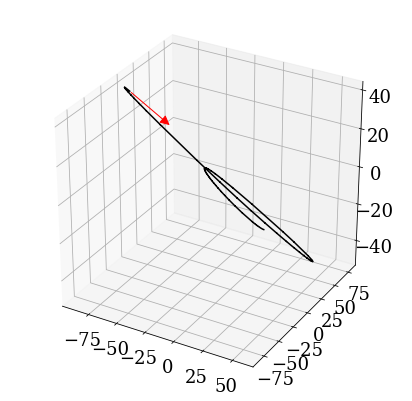

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(posNGC_sphMW[:,0], posNGC_sphMW[:,1], posNGC_sphMW[:,2], c='k')
a =Arrow3D([pos_NGC2419[0],pos_NGC2419[0]+vel_NGC_ar_normed[0]],[pos_NGC2419[1], pos_NGC2419[1]+vel_NGC_ar_normed[1]]
          ,[pos_NGC2419[2], pos_NGC2419[2]+vel_NGC_ar_normed[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")

ax.add_artist(a)


In [43]:
plot_3d_orbit(posNGC_sphMW, 'NGC_spherical_MW')

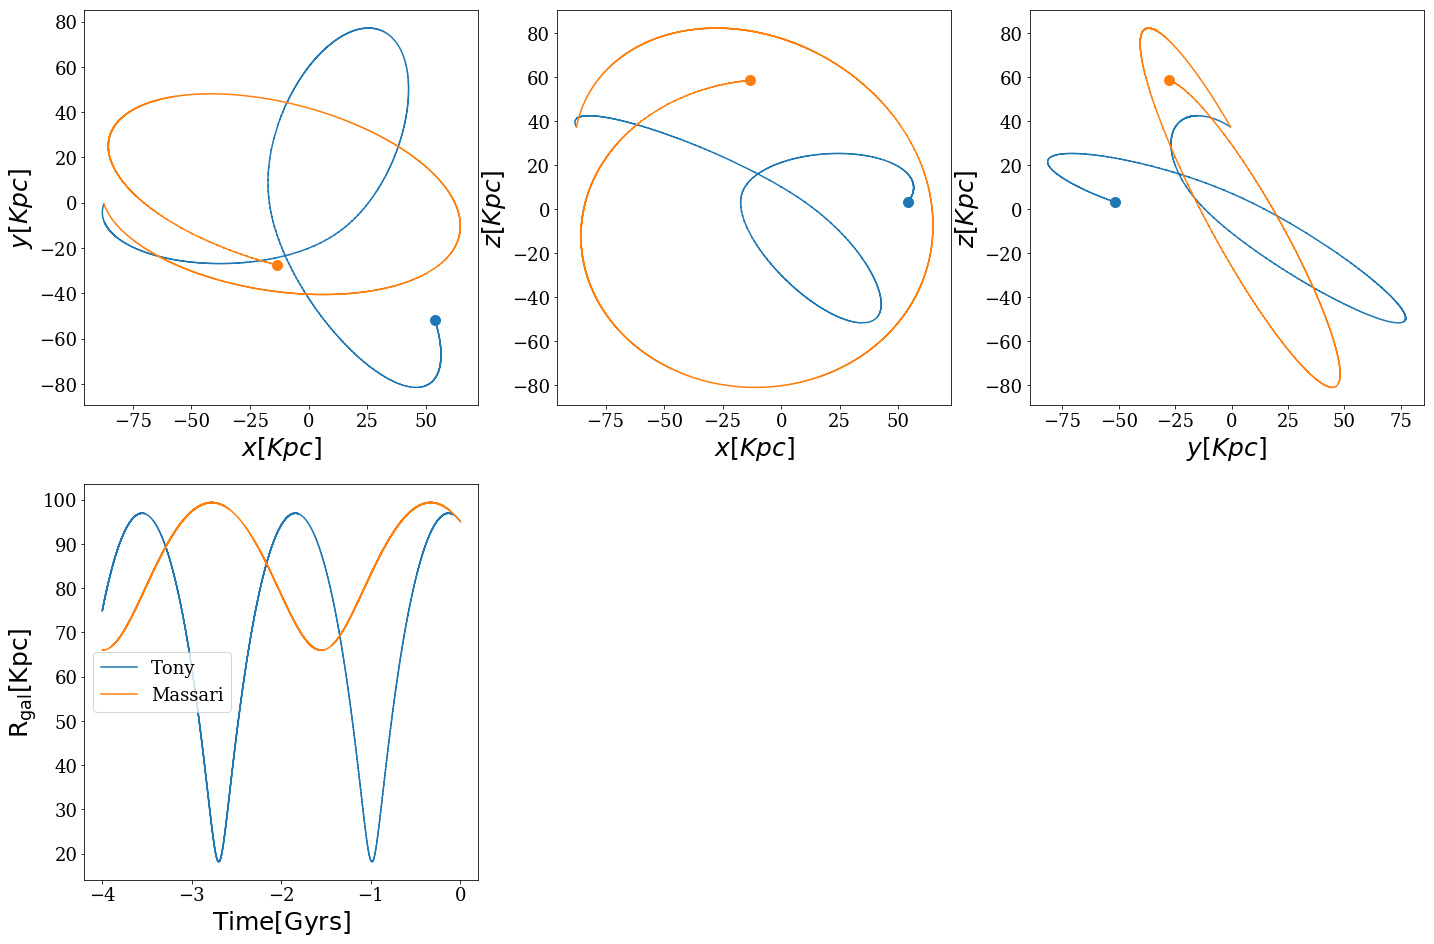

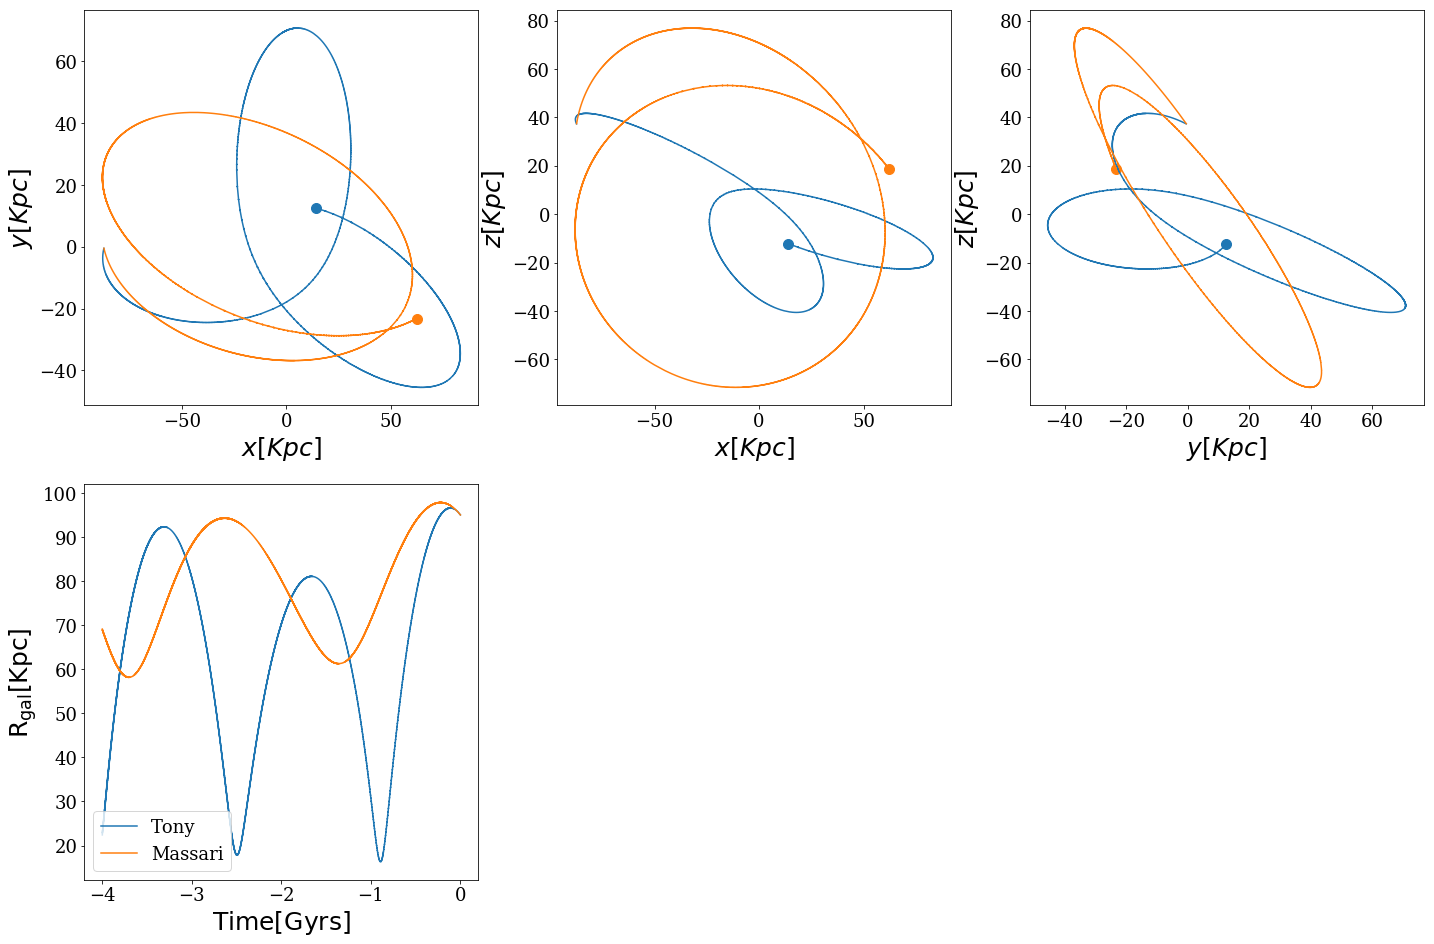

In [45]:
orbit_plots(t0, posNGC_sphMW, xyz2=posNGC_sphMW_M)

plt.savefig('NGC2419_sphMW.pdf', bbox_inches='tight', dpi=300)
#orbit_plots(t0_t, posNGC_sphMW_t)
#orbit_plots(t0_tM, posNGC_sphMW_tM)
orbit_plots(t0_t, posNGC_sphMW_t, xyz2=posNGC_sphMW_tM)
plt.savefig('NGC2419_Triaxial_MW.pdf', bbox_inches='tight', dpi=300)

# Orbits with Sag

In [4]:
def galactocentic(xyzMW, xyzSat):
    """
    Transforming to galactocentric coordinates
    """
    
    xyz_sat_gal = np.array([xyzSat[:,0]-xyzMW[:,0], xyzSat[:,1]-xyzMW[:,1],
                            xyzSat[:,2]-xyzMW[:,2]]).T
    return xyz_sat_gal

In [47]:
t1, posSag1, velSag1, posMWs1, velMWs1 = leapfrog.integrate_sat(8, pos_host, vel_host,
                                                               host_model, disk_params,
                                                               bulge_params,
                                                               dt=0.001, alpha=[0, 0.3],
                                                               pos_sat=sgr_pos,
                                                               vel_sat=sgr_vel,
                                                               satellite_model=satellite_model_sgr2)

Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12


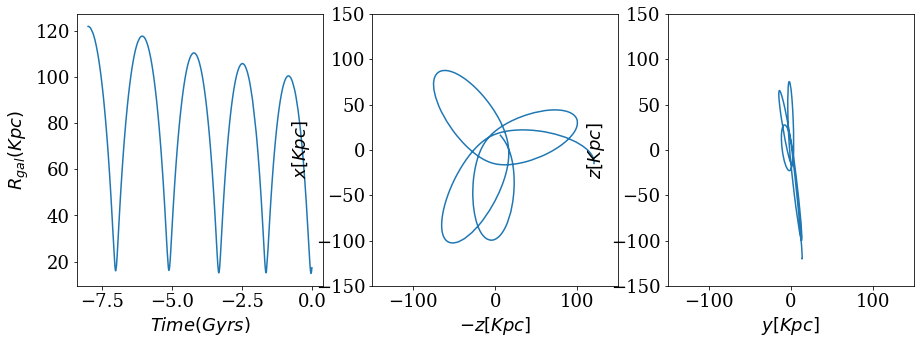

In [67]:
posSag_G1 = galactocentic(posMWs1, posSag1)

def sag_projections(time, pos_sag):
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    r_sag = (pos_sag[:,0]**2.0 + pos_sag[:,1]**2.0 + pos_sag[:,2]**2.0)**0.5
    plt.plot(time, r_sag, lw=1.5)
    plt.xlabel('$Time (Gyrs)$')
    plt.ylabel('$R_{gal} (Kpc)$')

    plt.subplot(1, 3, 2)
    plt.plot(-pos_sag[:,2], pos_sag[:,0])
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel('$-z[Kpc]$')
    plt.ylabel('$x[Kpc]$')

    plt.subplot(1, 3, 3)
    plt.plot(pos_sag[:,1], pos_sag[:,2])
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel('$y[Kpc]$')
    plt.ylabel('$z[Kpc]$')

sag_projections(t1, posSag_G1)
#plt.plot(t1, (posMWs1[:,0]**2 + posMWs1[:,1]**2 + posMWs1[:,2]**2)**0.5, lw=1.5, c='r')
#plt.plot(t1, (posSag1[:,0]**2 + posSag1[:,1]**2 + posSag1[:,2]**2)**0.5, lw=1.5, c='k', ls='--')

In [46]:
t2, posSag2, velSag2, posMWs2, velMWs2, posNGCs2, velNGCs2 = leapfrog.integrate_sat(time, pos_host, vel_host,
                                                                             host_model, disk_params,
                                                                             bulge_params,
                                                                             pos_p=pos_NGC2419, 
                                                                             vel_p=vel_NGC2419,
                                                                             dt=0.001, alpha=[0, 0.3],
                                                                             pos_sat=sgr_pos,
                                                                             vel_sat=sgr_vel,
                                                                             satellite_model=satellite_model_sgr2)


t2_M, posSag2_M, velSag2_M, posMWs2_M, velMWs2_M, posNGCs2_M, velNGCs2_M = leapfrog.integrate_sat(time, pos_host, vel_host,
                                                                             host_model, disk_params,
                                                                             bulge_params,
                                                                             pos_p=pos_NGC2419_2, 
                                                                             vel_p=vel_NGC2419_2,
                                                                             dt=0.001, alpha=[0, 0.3],
                                                                             pos_sat=sgr_pos,
                                                                             vel_sat=sgr_vel,
                                                                             satellite_model=satellite_model_sgr2)

Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : 16.1 2.35 -6.12


In [48]:
posSag_G2 = galactocentic(posMWs2, posSag2)
posNGC_G2 = galactocentic(posMWs2, posNGCs2)


posSag_G2M = galactocentic(posMWs2_M, posSag2_M)
posNGC_G2M = galactocentic(posMWs2_M, posNGCs2_M)

In [22]:
plot_3d_orbit(posNGC_G, 'NGC_sphericalMW+sagHenrquist', xyz2=posSag_G)

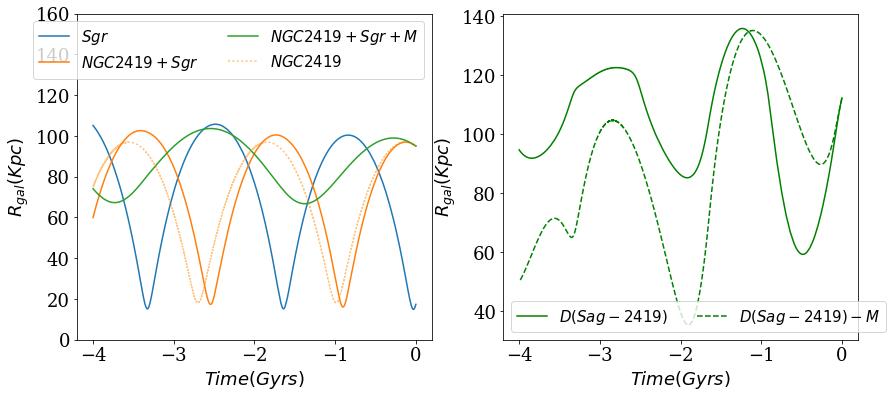

In [56]:
fig = plt.figure(figsize=(14, 6))


r_sag_G = (posSag_G2[:,0]**2.0 + posSag_G2[:,1]**2.0 + posSag_G2[:,2]**2.0)**0.5
r_NGC_G = (posNGC_G2[:,0]**2.0 + posNGC_G2[:,1]**2.0 + posNGC_G2[:,2]**2.0)**0.5
rel_d_sag_NGC = galactocentic(posSag2, posNGCs2)
r_rel = (rel_d_sag_NGC[:,0]**2.0 + rel_d_sag_NGC[:,1]**2.0 + rel_d_sag_NGC[:,2]**2.0)**0.5
r_NGCMW = (posNGC_sphMW[:,0]**2.0 + posNGC_sphMW[:,1]**2.0 + posNGC_sphMW[:,2]**2.0)**0.5


r_sag_G2M = (posSag_G2M[:,0]**2.0 + posSag_G2M[:,1]**2.0 + posSag_G2M[:,2]**2.0)**0.5
r_NGC_G2M = (posNGC_G2M[:,0]**2.0 + posNGC_G2M[:,1]**2.0 + posNGC_G2M[:,2]**2.0)**0.5
rel_d_sag_NGC_M = galactocentic(posSag2_M, posNGCs2_M)
r_rel_M = (rel_d_sag_NGC_M[:,0]**2.0 + rel_d_sag_NGC_M[:,1]**2.0 + rel_d_sag_NGC_M[:,2]**2.0)**0.5
#r_NGCMW = (posNGC_sphMW[:,0]**2.0 + posNGC_sphMW[:,1]**2.0 + posNGC_sphMW[:,2]**2.0)**0.5

plt.subplot(1,2,1)
plt.plot(t2, r_sag_G, lw=1.5, label='$Sgr$')
plt.plot(t2, r_NGC_G, lw=1.5, label='$NGC 2419+Sgr$')

#plt.plot(t2_M, r_sag_G2M, lw=1.5, label='$Sgr+M$', c='b', ls='--')
plt.plot(t2_M, r_NGC_G2M, lw=1.5, label='$NGC 2419+Sgr + M$')

plt.plot(t0, r_NGCMW, lw=1.5, label='$NGC2419$', ls=':', c='darkorange', alpha=0.5)
plt.ylim(0, 160)
plt.legend(loc='best', ncol=2, fontsize=15)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')

#plt.plot(t1, r_sag_G1, lw=1.5, c='k', alpha=0.5)
plt.subplot(1,2,2)
plt.plot(t2, r_rel, lw=1.5, label='$D(Sag-2419)$', ls='-', c='g')
plt.plot(t2_M, r_rel_M, lw=1.5, label='$D(Sag-2419)-M$', ls='--', c='g')

plt.legend(loc='best', ncol=2, fontsize=15)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')

plt.savefig('NGC2419_sphMWSGR.pdf', dpi=300, bbox_inches='tight')



In [58]:
time t2T, posSag2T, velSag2T, posMWs2T, velMWs2T, posNGCs2T, velNGCs2T = leapfrog.integrate_sat(time, pos_host, vel_host,
                                                                             host_model_T, disk_params,
                                                                             bulge_params,
                                                                             pos_p=pos_NGC2419, 
                                                                             vel_p=vel_NGC2419,
                                                                             dt=0.001, alpha=[0, 0.3],
                                                                             pos_sat=sgr_pos,
                                                                             vel_sat=sgr_vel,
                                                                             satellite_model=satellite_model_sgr2)


t2_TM, posSag2_TM, velSag2_TM, posMWs2_TM, velMWs2_TM, posNGCs2_TM, velNGCs2_TM = leapfrog.integrate_sat(time, pos_host, vel_host,
                                                                             host_model_T, disk_params,
                                                                             bulge_params,
                                                                             pos_p=pos_NGC2419_2, 
                                                                             vel_p=vel_NGC2419_2,
                                                                             dt=0.001, alpha=[0, 0.3],
                                                                             pos_sat=sgr_pos,
                                                                             vel_sat=sgr_vel,
                                                                             satellite_model=satellite_model_sgr2)

IndentationError: unexpected indent (<ipython-input-58-6f59011a9005>, line 2)

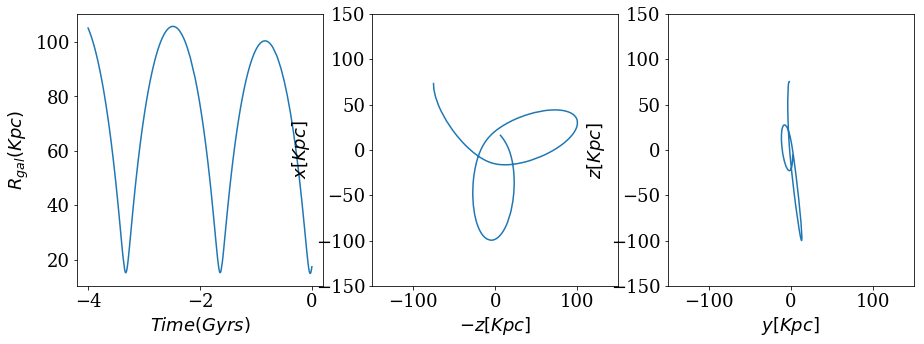

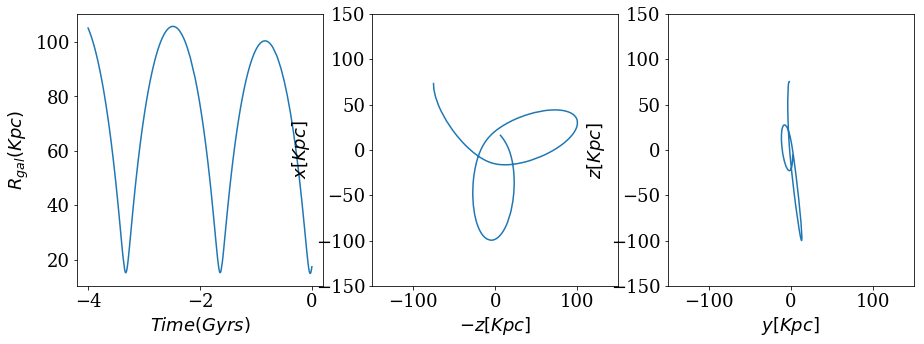

In [71]:
sag_projections(t2, posSag_G)
sag_projections(t1[:4000], posSag_G1[:4000])

# Orbits with Sag and the LMC

In [5]:
#satellite_model = ['hernquist', 1E9, 5]
#satellite_model = ['hernquist', 1E10, 9.8]
LMC_mod = ['hernquist', 3E10, 3]
satellite_model_sgr3 = ['NFW', 1E11, 58, 8.9]

# from purcell r_s = 6.5 kpc

In [27]:
t5, posLMC, velLMC, posMWsLMC, velMWsLMC, posNGCsLMC, velNGCsLMC, posSagLMC, velSagLMC = leapfrog.integrate_sat(4, pos_host, vel_host,
                                                                                             host_model, disk_params,
                                                                                             bulge_params,
                                                                                             pos_sat=[-1, -41, -28],
                                                                                             vel_sat=[-57,-226, 221],
                                                                                             satellite_model=LMC_mod,                                                    
                                                                                             pos_p=pos_NGC2419, 
                                                                                             vel_p=vel_NGC2419,
                                                                                             dt=0.001, alpha=[0, 0.3],
                                                                                             pos_sat2=sgr_pos,
                                                                                             vel_sat2=sgr_vel,
                                                                                             satellite_model2=satellite_model_sgr2)

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12


In [100]:
t5h, posLMCh, velLMCh, posMWshLMC, velMWshLMC, posNGCshLMC, velNGCshLMC, posSaghLMC, velSaghLMC = leapfrog.integrate_sat(4, pos_host, vel_host,
                                                                                             host_model, disk_params,
                                                                                             bulge_params,
                                                                                             pos_sat=[-1, -41, -28],
                                                                                             vel_sat=[-57,-226, 221],
                                                                                             satellite_model=LMC_mod,                                                    
                                                                                             pos_p=pos_NGC2419, 
                                                                                             vel_p=vel_NGC2419,
                                                                                             dt=0.001, alpha=[0, 0.3],
                                                                                             pos_sat2=sgr_pos,
                                                                                             vel_sat2=sgr_vel,
                                                                                             satellite_model2=satellite_model_sgr3)

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12


In [92]:
def NGC_Sgr_LMC_orbit(LMC_mod, satellite_model_sgr2):
    t5, posLMC, velLMC, posMWsLMC, velMWsLMC, posNGCsLMC, velNGCsLMC, posSagLMC, velSagLMC = leapfrog.integrate_sat(4, pos_host, vel_host,
                                                                                             host_model, disk_params,
                                                                                             bulge_params,
                                                                                             pos_sat=[-1, -41, -28],
                                                                                             vel_sat=[-57,-226, 221],
                                                                                             satellite_model=LMC_mod,                                                    
                                                                                             pos_p=pos_NGC2419, 
                                                                                             vel_p=vel_NGC2419,
                                                                                             dt=0.005, alpha=[0, 0.7],
                                                                                             pos_sat2=sgr_pos,
                                                                                             vel_sat2=sgr_vel,
                                                                                             satellite_model2=satellite_model_sgr2)
    posSag_GLMC = galactocentic(posMWsLMC, posSagLMC)
    posNGC_GLMC = galactocentic(posMWsLMC, posNGCsLMC)
    posLMC_GLMC = galactocentic(posMWsLMC, posLMC)
    rel_d_sag_NGCLMC = galactocentic(posSagLMC, posNGCsLMC)

    return t5, posNGC_GLMC, posSag_GLMC, posLMC_GLMC, rel_d_sag_NGCLMC

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
Satellite 2:  16.1 2.35 -6.12


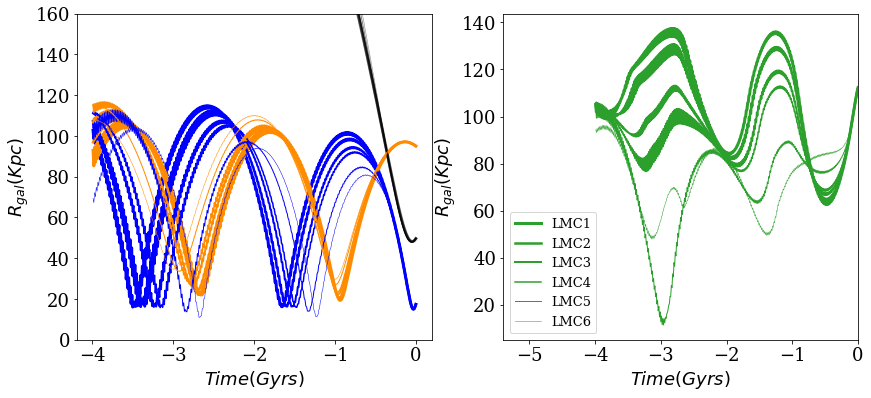

In [93]:
LMC_Ms = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]  
LMC_as = [3.0, 6.4, 10.4, 12.7, 20, 25.2]  
fig = plt.figure(figsize=(14, 6))
for i in range(len(LMC_Ms)):
    LMC_mod1 = ['hernquist', LMC_Ms[i], LMC_as[i]]
    time, posNGC, posSag, posLMC, relNGCSAG = NGC_Sgr_LMC_orbit(LMC_mod1, satellite_model_sgr2)

    plt.subplot(1,2,1)
    plt.plot(time, (posSag[:,0]**2.0 + posSag[:,1]**2.0 + posSag[:,2]**2.0)**0.5,
        label='$Sgr(+LMC)$', c='b', lw=(6-i)/2.)
    plt.plot(time, (posNGC[:,0]**2.0 + posNGC[:,1]**2.0 + posNGC[:,2]**2.0)**0.5,
            label='$NGC2419(+Sgr+LMC)$', c='darkorange', lw=(6-i)/2.)
    plt.plot(time, (posLMC[:,0]**2.0 + posLMC[:,1]**2.0 + posLMC[:,2]**2.0)**0.5
             , alpha=0.5, c='k', label='$LMC$', lw=(6-i)/2.)
    plt.ylim(0, 160)
    #plt.legend(loc='best', ncol=2, fontsize=14)
    plt.ylabel('$R_{gal} (Kpc)$')
    plt.xlabel('$Time (Gyrs)$')

    plt.subplot(1,2,2)
    plt.plot(time, np.sqrt(relNGCSAG[:,0]**2+relNGCSAG[:,1]**2+relNGCSAG[:,2]**2), 
             'C2', label='LMC{}'.format(str(i+1)), lw=(6-i)/2.)
    plt.legend(fontsize=13)
    plt.xlim(-5.4,0)
    plt.ylabel('$R_{gal} (Kpc)$')
    plt.xlabel('$Time (Gyrs)$')
    
#plt.savefig('gal_orbits_all_LMCs_Triaxial.pdf', dpi=300, bbox_inches='tight')

In [114]:
posSag_GLMC = galactocentic(posMWsLMC, posSagLMC)
posNGC_GLMC = galactocentic(posMWsLMC, posNGCsLMC)
posLMC_GLMC = galactocentic(posMWsLMC, posLMC)


posSag_GLMCh = galactocentic(posMWshLMC, posSaghLMC)
posNGC_GLMCh = galactocentic(posMWshLMC, posNGCshLMC)
posLMC_GLMCh = galactocentic(posMWshLMC, posLMCh)

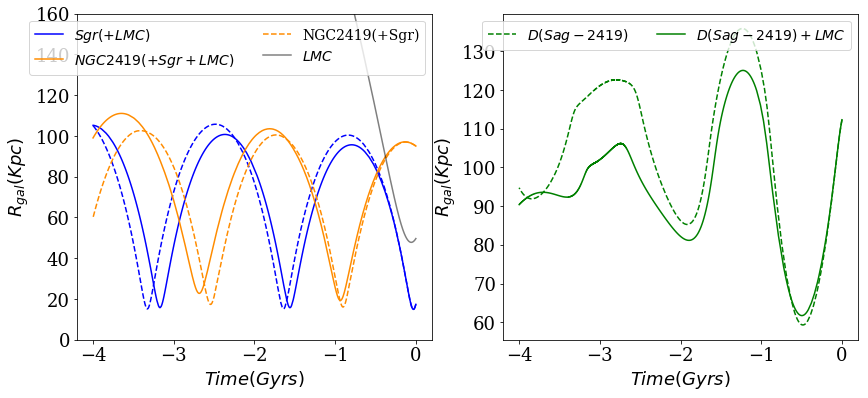

In [116]:
fig = plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.plot(t5, (posSag_GLMC[:,0]**2.0 + posSag_GLMC[:,1]**2.0 + posSag_GLMC[:,2]**2.0)**0.5,
        label='$Sgr(+LMC)$', c='b')
plt.plot(t2, r_sag_G, lw=1.5, c='b', ls='--')
plt.plot(t5, (posNGC_GLMC[:,0]**2.0 + posNGC_GLMC[:,1]**2.0 + posNGC_GLMC[:,2]**2.0)**0.5,
        label='$NGC2419(+Sgr+LMC)$', c='darkorange')
plt.plot(t2, r_NGC_G, lw=1.5, label='NGC2419(+Sgr)', c='darkorange', ls='--')

plt.plot(t5, (posLMC_GLMC[:,0]**2.0 + posLMC_GLMC[:,1]**2.0 + posLMC_GLMC[:,2]**2.0)**0.5
         , alpha=0.5, c='k', label='$LMC$')

plt.ylim(0, 160)
plt.legend(loc='best', ncol=2, fontsize=14)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')

plt.subplot(1,2,2)
rel_d_sag_NGCLMC = galactocentic(posSag_GLMC, posNGC_GLMC)
r_rel_LMC = (rel_d_sag_NGCLMC[:,0]**2.0 + rel_d_sag_NGCLMC[:,1]**2.0 + 
             rel_d_sag_NGCLMC[:,2]**2.0)**0.5

plt.plot(t2, r_rel, lw=1.5, label='$D(Sag-2419)$', ls='--', c='g')
plt.plot(t5, r_rel_LMC, lw=1.5, c='g', label='$D(Sag-2419)+LMC$')
plt.legend(loc='best', ncol=2, fontsize=14)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')
plt.savefig('NGC2419_sphMWSGRLMC.pdf', dpi=300, bbox_inches='tight')


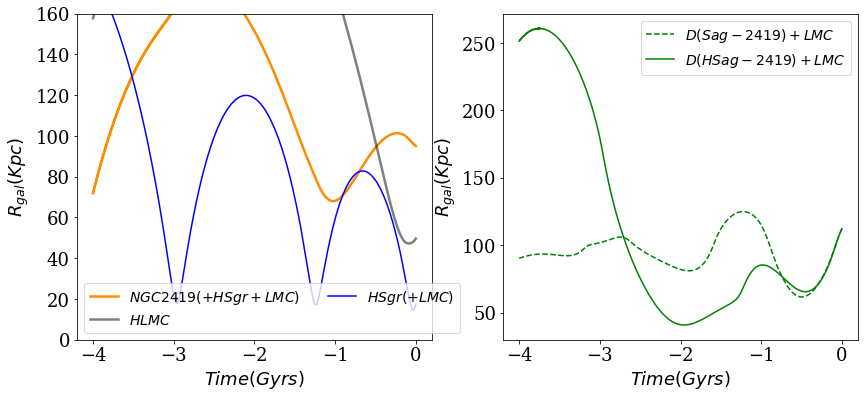

In [122]:
fig = plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.plot(t5h, (posNGC_GLMCh[:,0]**2.0 + posNGC_GLMCh[:,1]**2.0 + posNGC_GLMCh[:,2]**2.0)**0.5,
        label='$NGC2419(+HSgr+LMC)$', c='darkorange', lw=2.5)
plt.plot(t5h, (posLMC_GLMCh[:,0]**2.0 + posLMC_GLMCh[:,1]**2.0 + posLMC_GLMCh[:,2]**2.0)**0.5
         , alpha=0.5, c='k', label='$HLMC$', lw=2.5)
plt.plot(t5, (posSag_GLMCh[:,0]**2.0 + posSag_GLMCh[:,1]**2.0 + posSag_GLMCh[:,2]**2.0)**0.5,
        label='$HSgr(+LMC)$', c='b')

plt.ylim(0, 160)
plt.legend(loc='best', ncol=2, fontsize=14)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')

rel_d_sag_NGCLMC_h = galactocentic(posSag_GLMCh, posNGC_GLMCh)

r_rel_LMCh = (rel_d_sag_NGCLMC_h[:,0]**2.0 + rel_d_sag_NGCLMC_h[:,1]**2.0 + 
             rel_d_sag_NGCLMC_h[:,2]**2.0)**0.5

plt.subplot(1,2,2)

#plt.plot(t2, r_rel, lw=1.5, label='$D(Sag-2419)$', ls='--', c='g')
plt.plot(t5, r_rel_LMC, lw=1.5, c='g', label='$D(Sag-2419)+LMC$', ls='--')
plt.plot(t5, r_rel_LMCh, lw=1.5, c='g', label='$D(HSag-2419)+LMC$')
plt.legend(loc='best', ncol=1, fontsize=14)
plt.ylabel('$R_{gal} (Kpc)$')
plt.xlabel('$Time (Gyrs)$')
plt.savefig('NGC2419_sphMWHSGRLMC.pdf', dpi=300, bbox_inches='tight')


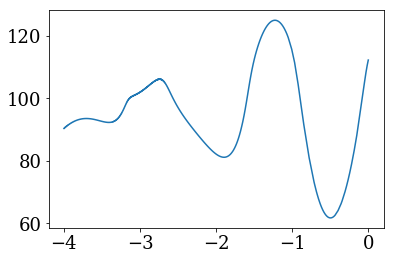

In [84]:
def plot_gal_r(time, r_sag, r_NGC, r_LMC):
    plt.plot(time, r_sag, lw=1.5, label='$Sgr$')
    plt.plot(time, r_NGC, lw=1.5, label='$NGC 2419+Sgr$', c='darkorange')
    plt.plot(time, r_LMC, lw=1.5, label='$NGC2419$', ls=':', c='darkorange', alpha=0.5)
    plt.ylim(0, 160)
    plt.legend(loc='best', ncol=2, fontsize=15)
    plt.ylabel('$R_{gal} (Kpc)$')
    plt.xlabel('$Time (Gyrs)$')
    

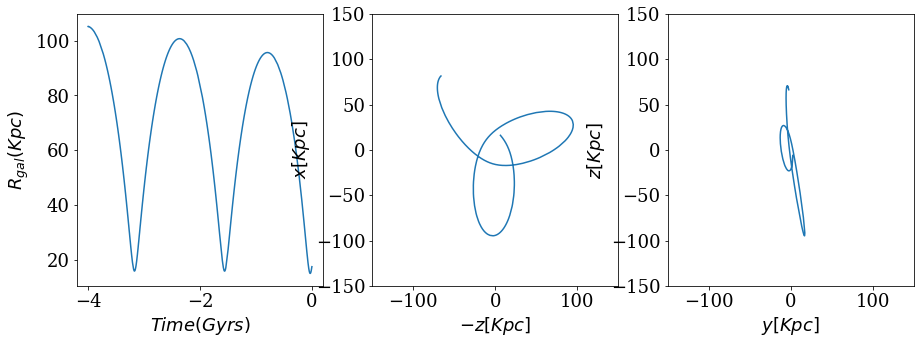

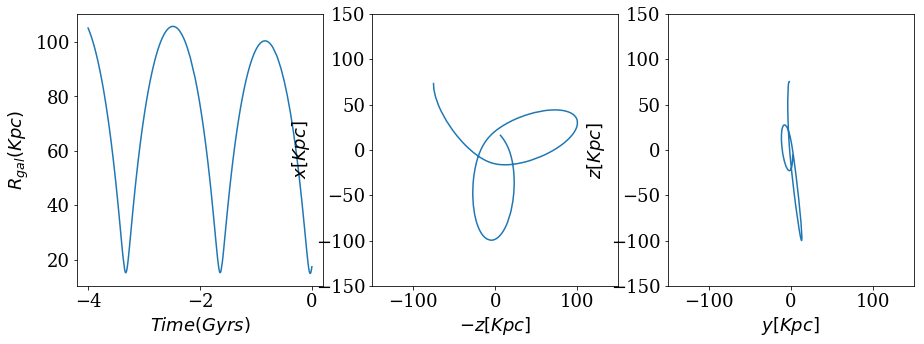

In [72]:
sag_projections(t5, posSag_GLMC)
sag_projections(t1[:4000], posSag_G1[:4000])



In [73]:
def orbit_plane(r, v):
    L = np.cross(r,v)
    return L/np.linalg.norm(L)

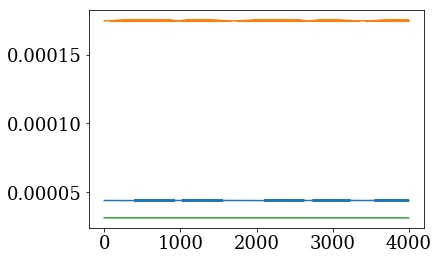

In [91]:
#orbit_plane(pos_NGC2419, vel_NGC2419)

L = orbit_plane(posNGC_sphMW, velNGC_sph_MW)
plt.plot(L[:,1]**2)

plt.plot(L[:,2]**2)

plt.plot(L[:,0]**2)

# Orbits in the Vera-Ciro 13 potential